In [26]:
# Imports
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import re

from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
from nltk.corpus import stopwords

# Agenda

1. Load the text file
2. Lowercasing the text
3. Removing special characters, numbers, and punctuation
4. Tokenization (splitting text into words or sentences)
5. Word Frequency before stopword removal
6. Stopword removal
7. Word Frequency after stopword removal
8. Creating a custom list for stopwords
9. Removing the domain-specific stopwords
10. Token length comparison

#### 1. Load the text file

In [3]:
with open("Barcelona.txt", "r", encoding="utf-8") as file:
    text = file.read()

print(text[:500])

Barcelona (/ˌbɑːrsəˈloʊnə/ ⓘ BAR-sə-LOH-nə; Catalan: [bəɾsəˈlonə] ⓘ; Spanish: [baɾθeˈlona] ⓘ) is a city on the northeastern coast of Spain. It is the capital and largest city of the autonomous community of Catalonia, as well as the second-most populous municipality of Spain. With a population of 1.6 million within city limits,[8] its urban area extends to numerous neighbouring municipalities within the province of Barcelona and is home to around 5.3 million people,[3] making it the fifth most po


#### 2. Lowercasing the text


In [5]:
text_lowercase = text.lower()
print(text_lowercase[:500])

barcelona (/ˌbɑːrsəˈloʊnə/ ⓘ bar-sə-loh-nə; catalan: [bəɾsəˈlonə] ⓘ; spanish: [baɾθeˈlona] ⓘ) is a city on the northeastern coast of spain. it is the capital and largest city of the autonomous community of catalonia, as well as the second-most populous municipality of spain. with a population of 1.6 million within city limits,[8] its urban area extends to numerous neighbouring municipalities within the province of barcelona and is home to around 5.3 million people,[3] making it the fifth most po


#### 3. Removing special characters, numbers, and punctuation


In [6]:
text_cleaned = re.sub(r"[^a-zA-Z\s]", "", text_lowercase)
print(text_cleaned[:500])

barcelona brslon  barslohn catalan bslon  spanish baelona  is a city on the northeastern coast of spain it is the capital and largest city of the autonomous community of catalonia as well as the secondmost populous municipality of spain with a population of  million within city limits its urban area extends to numerous neighbouring municipalities within the province of barcelona and is home to around  million people making it the fifth most populous urban area of the european union after paris t


#### 4. Tokenization (splitting text into words or sentences)

##### Word tokenization

In [27]:
words = word_tokenize(text_cleaned)
print(tokens[:20])

['barcelona', 'brslon', 'barslohn', 'catalan', 'bslon', 'spanish', 'baelona', 'is', 'a', 'city', 'on', 'the', 'northeastern', 'coast', 'of', 'spain', 'it', 'is', 'the', 'capital']


##### Sentence tokenization

In [28]:
sent_tokens = sent_tokenize(text_cleaned)
for sent in sent_tokens:
    print(sent)

barcelona brslon  barslohn catalan bslon  spanish baelona  is a city on the northeastern coast of spain it is the capital and largest city of the autonomous community of catalonia as well as the secondmost populous municipality of spain with a population of  million within city limits its urban area extends to numerous neighbouring municipalities within the province of barcelona and is home to around  million people making it the fifth most populous urban area of the european union after paris the ruhr area madrid and milan it is one of the largest metropolises on the mediterranean sea located on the coast between the mouths of the rivers llobregat and bess bounded to the west by the serra de collserola mountain range

according to tradition barcelona was founded by either the phoenicians or the carthaginians who had trading posts along the catalonian coast in the middle ages barcelona became the capital of the county of barcelona after joining with the kingdom of aragon to form the co

#### 5. Word Frequency before stopword removal

In [29]:
# Counting the tokens
word_freq = Counter(tokens)
print(word_freq)

Counter({'the': 915, 'of': 491, 'and': 326, 'in': 308, 'barcelona': 248, 'a': 209, 'to': 163, 'city': 143, 'is': 131, 'by': 118, 'as': 108, 'with': 82, 'de': 78, 'it': 66, 'was': 63, 'are': 63, 'for': 63, 'from': 53, 'has': 52, 'on': 51, 'that': 45, 'an': 44, 'also': 44, 'which': 40, 'or': 36, 'at': 35, 'population': 34, 'its': 33, 'most': 33, 'catalan': 31, 'spanish': 31, 'world': 31, 'one': 28, 'area': 27, 'museum': 27, 'c': 27, 'main': 26, 'port': 26, 'catalonia': 25, 'been': 24, 'public': 24, 'spain': 22, 'centre': 22, 'average': 22, 'barcelonas': 21, 'la': 21, 'largest': 20, 'year': 20, 'than': 20, 'were': 20, 'km': 20, 'number': 20, 'f': 20, 'be': 19, 'two': 19, 'airport': 19, 'per': 19, 'european': 18, 'after': 18, 'have': 18, 'can': 18, 'council': 18, 'th': 17, 'government': 17, 'many': 17, 'international': 17, 'more': 17, 'mi': 17, 'park': 17, 'people': 16, 'other': 16, 'needed': 16, 'sant': 16, 'several': 16, 'million': 15, 'urban': 15, 'had': 15, 'during': 15, 'but': 15, 'th

In [30]:
# Taking the 20 most common
most_common_words = word_freq.most_common(20)
print(most_common_words)

[('the', 915), ('of', 491), ('and', 326), ('in', 308), ('barcelona', 248), ('a', 209), ('to', 163), ('city', 143), ('is', 131), ('by', 118), ('as', 108), ('with', 82), ('de', 78), ('it', 66), ('was', 63), ('are', 63), ('for', 63), ('from', 53), ('has', 52), ('on', 51)]


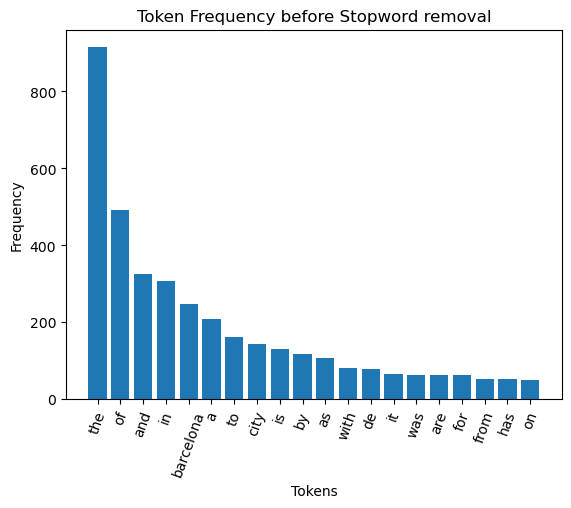

In [31]:
# Visualization

plt.bar(*zip(*most_common_words))
plt.xticks(rotation=70)
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.title("Token Frequency before Stopword removal")

plt.show()

#### 6. Stopword Removal

In [34]:
# Initializing the stopwords
stop_words = set(stopwords.words("English"))
print(stop_words)

{'to', 'll', 's', 'very', 'and', 'further', 'was', 'or', 'there', 'me', 'but', 'above', 'y', "mightn't", 'at', 'will', 'hadn', "don't", 'most', 'should', 'mustn', 'about', 'again', 'itself', 'has', 'yours', 'doing', "she's", 'ma', 'am', 'for', 'doesn', 'a', 'with', 'if', 'each', 'isn', 'hasn', "you're", 'needn', 'our', 'so', 'o', 'his', 'ain', "it's", 'over', 'do', 'wasn', 'myself', 'the', 'nor', 'herself', "haven't", 'yourselves', 'out', "hadn't", 'are', 'we', 'in', 'she', 'their', 'been', 'here', 'both', 'such', 'they', 'through', "should've", "aren't", 'because', 'he', 'is', 'as', 'up', 'then', 'where', 'you', 'did', "hasn't", 'below', 'himself', 'didn', 'were', 'any', 'him', 'does', 'no', 'i', 'on', 'haven', 'an', 're', "you've", 'themselves', 'off', 'than', 'wouldn', 'of', 'my', 'aren', "you'll", 'be', 'after', 'your', 'only', 'theirs', 'shan', "wasn't", 'those', "shan't", 'whom', "isn't", 'down', 'her', 'who', "couldn't", 'by', 'against', "doesn't", 'same', 'which', 'weren', 'all

In [37]:
#Removing the stopwords
filtered_words = [word for word in words if word not in stop_words]
print(filtered_words[:50])

['barcelona', 'brslon', 'barslohn', 'catalan', 'bslon', 'spanish', 'baelona', 'city', 'northeastern', 'coast', 'spain', 'capital', 'largest', 'city', 'autonomous', 'community', 'catalonia', 'well', 'secondmost', 'populous', 'municipality', 'spain', 'population', 'million', 'within', 'city', 'limits', 'urban', 'area', 'extends', 'numerous', 'neighbouring', 'municipalities', 'within', 'province', 'barcelona', 'home', 'around', 'million', 'people', 'making', 'fifth', 'populous', 'urban', 'area', 'european', 'union', 'paris', 'ruhr', 'area']


#### 7. Word Frequency after stopword removal

In [39]:
# Counting the words after stopword removal
word_count_after_removal = Counter(filtered_words)
print(word_count_after_removal)

Counter({'barcelona': 248, 'city': 143, 'de': 78, 'also': 44, 'population': 34, 'catalan': 31, 'spanish': 31, 'world': 31, 'one': 28, 'area': 27, 'museum': 27, 'c': 27, 'main': 26, 'port': 26, 'catalonia': 25, 'public': 24, 'spain': 22, 'centre': 22, 'average': 22, 'barcelonas': 21, 'la': 21, 'largest': 20, 'year': 20, 'km': 20, 'number': 20, 'f': 20, 'two': 19, 'airport': 19, 'per': 19, 'european': 18, 'council': 18, 'th': 17, 'government': 17, 'many': 17, 'international': 17, 'mi': 17, 'park': 17, 'people': 16, 'needed': 16, 'sant': 16, 'several': 16, 'million': 15, 'urban': 15, 'del': 15, 'capital': 14, 'mediterranean': 14, 'according': 14, 'important': 14, 'major': 14, 'university': 14, 'summer': 14, 'may': 14, 'fc': 14, 'including': 14, 'montjuc': 14, 'citys': 14, 'services': 14, 'known': 13, 'article': 13, 'catalunya': 13, 'ha': 13, 'well': 12, 'later': 12, 'europe': 12, 'capacity': 12, 'municipal': 12, 'palau': 12, 'three': 12, 'community': 11, 'home': 11, 'located': 11, 'aragon

In [40]:
# Most common words
most_common_20_after_removal = word_count_after_removal.most_common(20)
print(most_common_20_after_removal)

[('barcelona', 248), ('city', 143), ('de', 78), ('also', 44), ('population', 34), ('catalan', 31), ('spanish', 31), ('world', 31), ('one', 28), ('area', 27), ('museum', 27), ('c', 27), ('main', 26), ('port', 26), ('catalonia', 25), ('public', 24), ('spain', 22), ('centre', 22), ('average', 22), ('barcelonas', 21)]


In [52]:
# Sorting the most common words in descending order (in respect of the frequency)
most_common_20_after_removal.sort(key=lambda x:x[1], reverse=False)

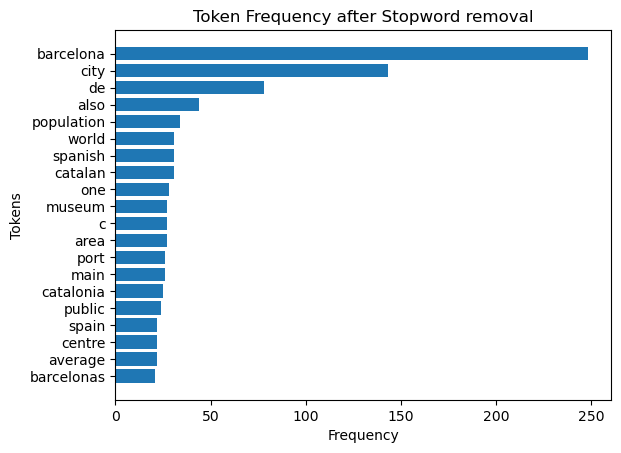

In [53]:
# Visualizing with horizontal barchart
plt.barh(*zip(*most_common_20_after_removal))
plt.ylabel("Tokens")
plt.xlabel("Frequency")
plt.title("Token Frequency after Stopword removal")

plt.show()

#### 8. Creating a custom list for stopwords


In [70]:
# Creating the domain spacific list
domain_specific_stopwords = {"barcelona", "de", "also", "one", "c", "barcelonas", "la", "km", "f", "number", "per", "two", 
                             "year", "th", "many", "average", "mi"}

#### 9. Removing the domain-specific stopwords

In [73]:
# Removing the domain-specific words
filtered_words_2 = [word for word in filtered_words if word not in domain_specific_stopwords]

# Counting the words after the removal
word_counts = Counter(filtered_words_2)
word_counts_most_common_20 = word_counts.most_common(20)

#Printing the 20 most common
print(word_counts_most_common_20)

[('city', 143), ('population', 34), ('catalan', 31), ('spanish', 31), ('world', 31), ('area', 27), ('museum', 27), ('main', 26), ('port', 26), ('catalonia', 25), ('public', 24), ('spain', 22), ('centre', 22), ('largest', 20), ('airport', 19), ('european', 18), ('council', 18), ('government', 17), ('international', 17), ('park', 17)]


In [80]:
# Sorting the words
word_counts_most_common_20.sort(key = lambda x:x[1], reverse = False)

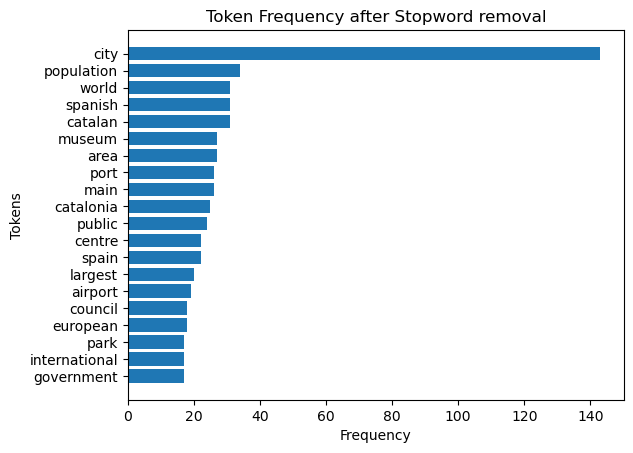

In [81]:
# Visualization

plt.barh(*zip(*word_counts_most_common_20))
plt.ylabel("Tokens")
plt.xlabel("Frequency")
plt.title("Token Frequency after Stopword removal")

plt.show()

#### 10. Token length comparison

In [85]:
# Number of tokens before stopword removal

len(tokens)

10609

In [86]:
# Number of tokens after stopword removal

len(filtered_words)

6475

In [88]:
# Number of tokens after domain-specific stopword removal

len(filtered_words_2)

5817